### NOTE: If running from colab and you have uploaded the folder ERA-V1/era_v1_session7_pankaja then uncomment the two cells below and run before moving on to Install libraries

In [ ]:
# from google.colab import drive
# drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [ ]:
# %cd /gdrive/My\ Drive/ERA-V1/era_v1_session7_pankaja

/gdrive/My Drive/ERA-V1/era_v1_session7_pankaja


### Target:
- Add various Image augmentation techniques, image rotation, randomaffine, colorjitter

### Results:
- Parameters: 6124
- Best Training Accuracy: 97.61
- Best Test Accuracy: 99.32%

### Analysis:
- he model is under-fitting, that should be ok as we know we have made our train data harder.
- However, we haven't reached 99.4 accuracy yet.
- The model seems to be stuck at 99.2% accuracy, seems like the model needs some additional capacity towards the end.

# Install Libraries

In [ ]:
!pip install torchsummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Import Libraries

In [ ]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

from tqdm import tqdm
from torchsummary import summary

# for visualization
%matplotlib inline
import matplotlib.pyplot as plt

from model import Model_6, download_model_data, create_data_loader, train_and_predict
from utils import get_device, plot_metrics

## Data Transformations

We first start with defining our data transformations. We need to think what our data is and how can we augment it to correct represent images which it might not see otherwise.

Here is the list of all the transformations which come pre-built with PyTorch

1.   Compose
2.   ToTensor
3.   ToPILImage
4. Normalize
5. Resize
6. Scale
7. CenterCrop
8. Pad
9. Lambda
10. RandomApply
11. RandomChoice
12. RandomOrder
13. RandomCrop
14. RandomHorizontalFlip
15. RandomVerticalFlip
16. RandomResizedCrop
17. RandomSizedCrop
18. FiveCrop
19. TenCrop
20. LinearTransformation
21. ColorJitter
22. RandomRotation
23. RandomAffine
24. Grayscale
25. RandomGrayscale
26. RandomPerspective
27. RandomErasing

You can read more about them [here](https://pytorch.org/docs/stable/_modules/torchvision/transforms/transforms.html)

## Load and Prepare Dataset

MNIST contains 70,000 images of handwritten digits: 60,000 for training and 10,000 for testing. The images are grayscale, 28x28 pixels

We load the PIL images using torchvision.datasets.MNIST, while loading the image we transform he data to tensor and normalize the images with mean and std deviation of MNIST images.

Data tasks:
- transformers
- data download
- train and test split

In [ ]:
SEED = 1

# CUDA?
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)

# For reproducibility
torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

ds_train, ds_test = download_model_data()
# dataloader arguments - something you'll fetch these from cmdprmt
kw_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

# train dataloader
train_loader = torch.utils.data.DataLoader(ds_train, **kw_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(ds_test, **kw_args)

CUDA Available? True


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


# The model
Add batch normalization, no matter how complex is the data batch normalization can handle that. Batch norm fixes the problems with high contrast and low contract issues with the images.

Batch normaliztion maintains and stores a specific mean and std deviation for each layer, because it has to normlize it and untilmately it has to learn how to normalize the particular layer evntually even during the inference,  so there is a increase in the number of parameters after batch norm

In [ ]:
device = get_device()
print(device)
model = Model_6().to(device)
summary(model, input_size=(1, 28, 28))

CUDA Available? True
cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 26, 26]              72
       BatchNorm2d-2            [-1, 8, 26, 26]              16
              ReLU-3            [-1, 8, 26, 26]               0
           Dropout-4            [-1, 8, 26, 26]               0
            Conv2d-5           [-1, 16, 24, 24]           1,152
       BatchNorm2d-6           [-1, 16, 24, 24]              32
              ReLU-7           [-1, 16, 24, 24]               0
           Dropout-8           [-1, 16, 24, 24]               0
         MaxPool2d-9           [-1, 16, 12, 12]               0
           Conv2d-10            [-1, 8, 12, 12]             128
      BatchNorm2d-11            [-1, 8, 12, 12]              16
             ReLU-12            [-1, 8, 12, 12]               0
          Dropout-13            [-1, 8, 12, 12]               0
           Co

### Train and test our model

In [ ]:
train_losses6 = []
test_losses6 = []
train_acc6 = []
test_acc6 = []

model =  Model_6().to(device)
epochs = 15
lr = 0.01
train_losses6, train_acc6, test_losses6, test_acc6 = train_and_predict(model, device,
                                                                   train_loader=train_loader,
                                                                   test_loader=test_loader,
                                                                   num_epochs=epochs, lr=lr)

Epoch 1


Train: Loss=0.1517 Batch_id=468 Accuracy=78.82: 100%|██████████| 469/469 [00:19<00:00, 24.57it/s]


Test set: Average loss: 0.1392, Accuracy: 9728/10000 (97.28%)

Epoch 2


Train: Loss=0.0668 Batch_id=468 Accuracy=97.17: 100%|██████████| 469/469 [00:21<00:00, 21.43it/s]


Test set: Average loss: 0.0692, Accuracy: 9832/10000 (98.32%)

Epoch 3


Train: Loss=0.0952 Batch_id=468 Accuracy=97.96: 100%|██████████| 469/469 [00:22<00:00, 20.93it/s]


Test set: Average loss: 0.0570, Accuracy: 9850/10000 (98.50%)

Epoch 4


Train: Loss=0.0780 Batch_id=468 Accuracy=98.28: 100%|██████████| 469/469 [00:19<00:00, 23.98it/s]


Test set: Average loss: 0.0466, Accuracy: 9878/10000 (98.78%)

Epoch 5


Train: Loss=0.0559 Batch_id=468 Accuracy=98.47: 100%|██████████| 469/469 [00:20<00:00, 22.85it/s]


Test set: Average loss: 0.0400, Accuracy: 9883/10000 (98.83%)

Epoch 6


Train: Loss=0.1000 Batch_id=468 Accuracy=98.56: 100%|██████████| 469/469 [00:19<00:00, 23.72it/s]


Test set: Average loss: 0.0421, Accuracy: 9879/10000 (98.79%)

Epoch 7


Train: Loss=0.0225 Batch_id=468 Accuracy=98.58: 100%|██████████| 469/469 [00:20<00:00, 22.68it/s]


Test set: Average loss: 0.0436, Accuracy: 9863/10000 (98.63%)

Epoch 8


Train: Loss=0.0216 Batch_id=468 Accuracy=98.75: 100%|██████████| 469/469 [00:19<00:00, 23.56it/s]


Test set: Average loss: 0.0318, Accuracy: 9903/10000 (99.03%)

Epoch 9


Train: Loss=0.0235 Batch_id=468 Accuracy=98.81: 100%|██████████| 469/469 [00:20<00:00, 23.33it/s]


Test set: Average loss: 0.0305, Accuracy: 9910/10000 (99.10%)

Epoch 10


Train: Loss=0.0174 Batch_id=468 Accuracy=98.80: 100%|██████████| 469/469 [00:20<00:00, 22.60it/s]


Test set: Average loss: 0.0300, Accuracy: 9915/10000 (99.15%)

Epoch 11


Train: Loss=0.0411 Batch_id=468 Accuracy=98.84: 100%|██████████| 469/469 [00:19<00:00, 24.55it/s]


Test set: Average loss: 0.0317, Accuracy: 9906/10000 (99.06%)

Epoch 12


Train: Loss=0.0316 Batch_id=468 Accuracy=98.92: 100%|██████████| 469/469 [00:19<00:00, 24.29it/s]


Test set: Average loss: 0.0268, Accuracy: 9917/10000 (99.17%)

Epoch 13


Train: Loss=0.0483 Batch_id=468 Accuracy=98.97: 100%|██████████| 469/469 [00:19<00:00, 24.64it/s]


Test set: Average loss: 0.0264, Accuracy: 9927/10000 (99.27%)

Epoch 14


Train: Loss=0.1055 Batch_id=468 Accuracy=98.98: 100%|██████████| 469/469 [00:19<00:00, 24.65it/s]


Test set: Average loss: 0.0276, Accuracy: 9916/10000 (99.16%)

Epoch 15


Train: Loss=0.0318 Batch_id=468 Accuracy=99.00: 100%|██████████| 469/469 [00:19<00:00, 24.60it/s]


Test set: Average loss: 0.0269, Accuracy: 9903/10000 (99.03%)



### Plot the train and test losses and accuracies for Model_6

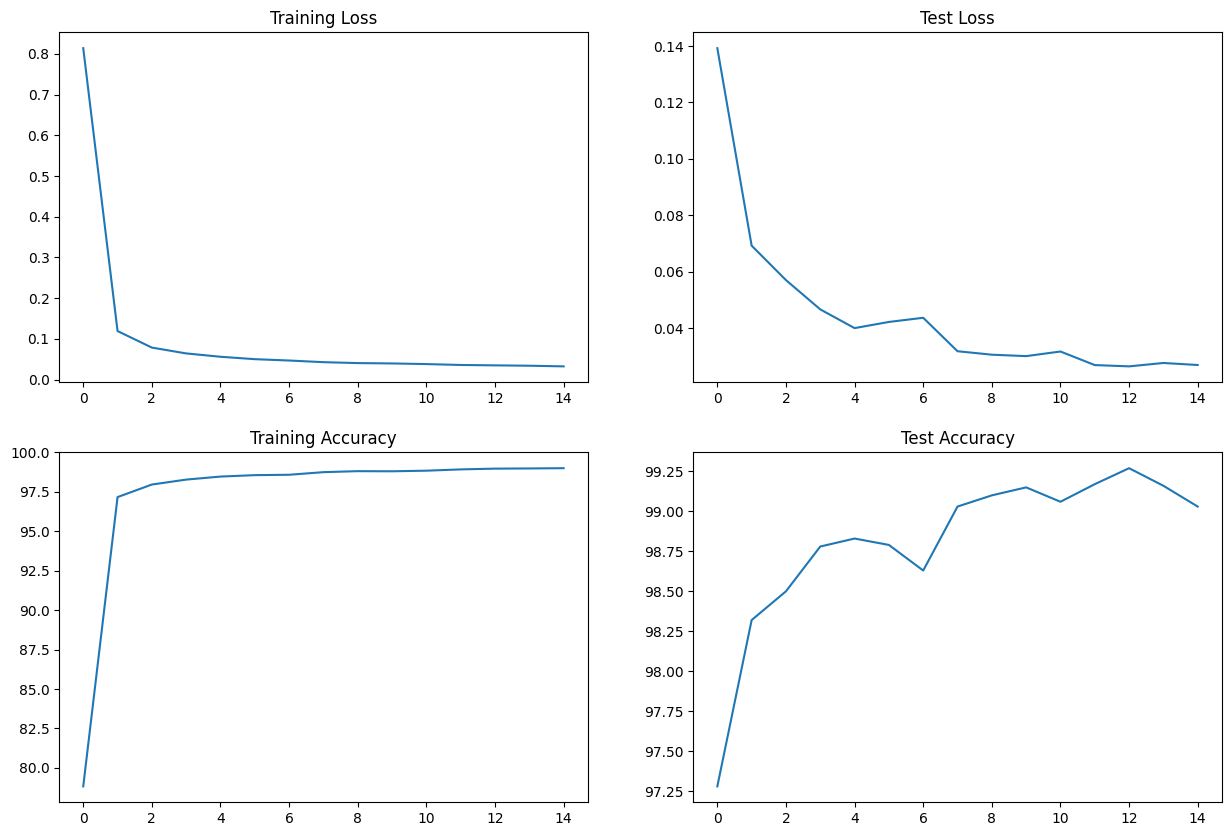

In [ ]:
plot_metrics(train_losses6, train_acc6, test_losses6, test_acc6)

### Incorrect Predictions

In [ ]:
def extract_incorrect_predictions(test_loader,model,device):
  wrong_images=[]
  wrong_label=[]
  correct_label=[]
  with torch.no_grad():
    for data, target in test_loader:
      data, target = data.to(device), target.to(device)
      output = model(data)
      pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability

      wrong_pred = (pred.eq(target.view_as(pred)) == False)
      wrong_images.append(data[wrong_pred])
      wrong_label.append(pred[wrong_pred])
      correct_label.append(target.view_as(pred)[wrong_pred])

  return list(zip(torch.cat(wrong_images),torch.cat(wrong_label),torch.cat(correct_label)))

In [ ]:
incorrect_predictions = extract_incorrect_predictions(test_loader,model,device)

In [ ]:
print(f'Total incorrect predictions are {len(incorrect_predictions)}')

Total incorrect predictions are 97


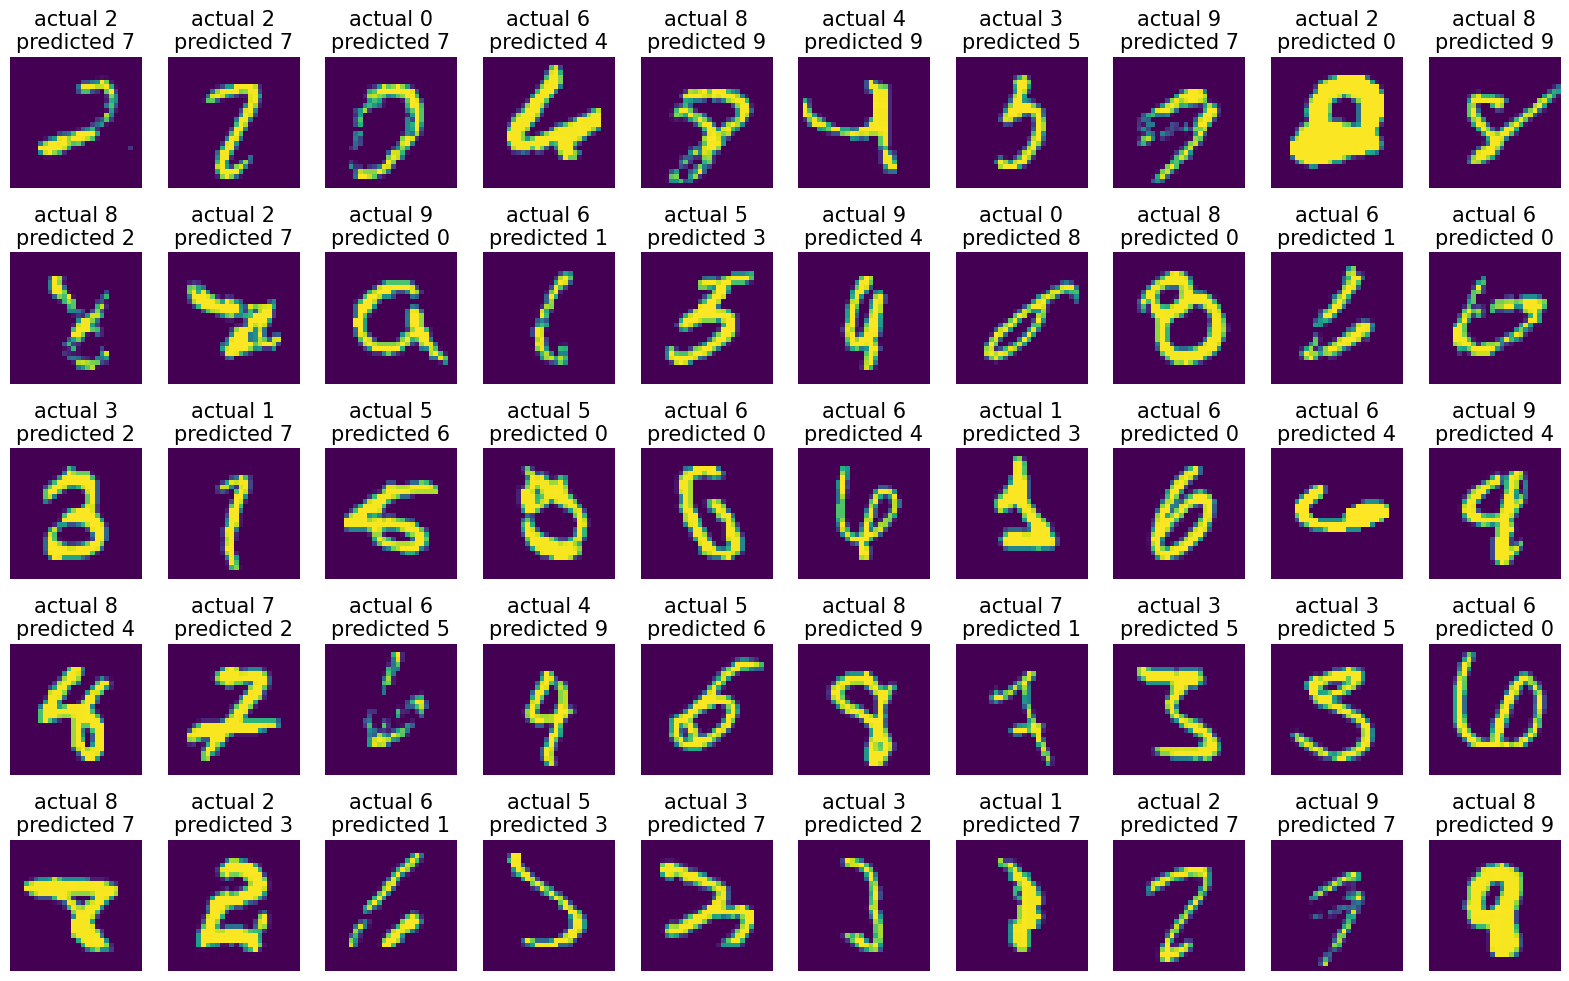

In [ ]:
fig = plt.figure(figsize=(20,25))
for i, (img, pred, correct) in enumerate(incorrect_predictions[:50]):
    img, pred, target = img.cpu().numpy(), pred.cpu(), correct.cpu()
    ax = fig.add_subplot(10, 10, i+1)
    ax.axis('off')
    ax.set_title(f'actual {target.item()}\npredicted {pred.item()}',fontsize=15)
    ax.imshow(img.squeeze())
plt.show()